# S3 for Siddiqui et al 

In [1]:
# import sys
# !conda install --yes --prefix {sys.prefix} dask distributed bottleneck netCDF4 xarray cartopy<0.20 esmpy geopy xesmf esmf xgcm Ipython tqdm ffmpeg aiohttp pandas eofs cmocean gsw pycwt nc-time-axis fastjmd95 pip pooch h5netcdf scipy pydap zarr fsspec cftime rasterio cfgrib matplotlib cf_xarray ipykernel pys2index cmasher imageio pre-commit xmitgcm
    
# !{sys.executable} -m pip install --no-deps --force-reinstall git+https://github.com/hainegroup/oceanspy.git

In [2]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (18, 6),
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20'}
pylab.rcParams.update(params)

In [4]:
from matplotlib.patches import Polygon
%matplotlib inline

import warnings

import matplotlib.path                 as mpath
import cartopy.crs                     as ccrs
import cartopy.mpl.ticker              as ctk
import cartopy.feature as cfeature
import cartopy.mpl.patch as cpatch
import matplotlib as mpl

In [5]:
pylab.rcParams.update({
  "text.usetex": True
})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [7]:
ds = xr.open_dataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/EN4/en4_sal_annual_1000.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 173, lon: 360, year: 26)
Coordinates:
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 -79.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * year     (year) int64 1992 1993 1994 1995 1996 ... 2013 2014 2015 2016 2017
Data variables:
    en4_sal  (year, lat, lon) float64 ...

In [8]:
grid = xr.open_dataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data//ETOPO/ETOPO1_Ice_g_gmt4.grd', decode_cf=True, engine='netcdf4')
grid

<xarray.Dataset>
Dimensions:  (x: 21601, y: 10801)
Coordinates:
  * x        (x) float64 -180.0 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0 180.0
  * y        (y) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Data variables:
    z        (y, x) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        ETOPO1_Ice_g_gmt4.grd
    GMT_version:  4.4.0
    node_offset:  0

In [9]:
grid=grid.sel(y=slice(0,90), x=slice(-120,50)).where(grid.z>0)
grid

<xarray.Dataset>
Dimensions:  (y: 5401, x: 10201)
Coordinates:
  * x        (x) float64 -120.0 -120.0 -120.0 -120.0 ... 49.95 49.97 49.98 50.0
  * y        (y) float64 2.717e-14 0.01667 0.03333 0.05 ... 89.97 89.98 90.0
Data variables:
    z        (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        ETOPO1_Ice_g_gmt4.grd
    GMT_version:  4.4.0
    node_offset:  0

In [10]:
grid = grid.load()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()


<timed exec>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
<timed exec>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


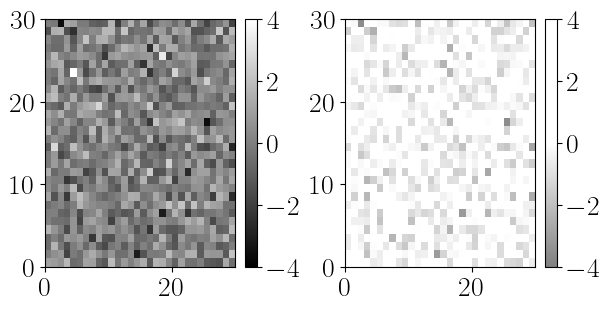

CPU times: user 1.83 s, sys: 314 ms, total: 2.15 s
Wall time: 1.86 s


In [12]:
%%time
viridis = cm.get_cmap('gray', 256)
viridis_big = cm.get_cmap('gray')
newcmp = ListedColormap(viridis_big(np.linspace(0.5,1.5,128)))
plot_examples([viridis, newcmp])

In [13]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='black')


In [14]:
# # fixed a plotting issue by bumping numpy to 1.22.0
# # fixed the label issue for cartopy by playing with 'ha' and 'va'

# from matplotlib.colors import BoundaryNorm
# from matplotlib.ticker import MaxNLocator

# fig= plt.figure(figsize=(10,10), frameon=True)

# # defining the projection 
# lon1, lon2, lat1, lat2 = [-100, 20, 20, 85]

# rect = mpath.Path([[lon1, lat1], [lon2, lat1],
#     [lon2, lat2], [lon1, lat2], [lon1, lat1]], closed=True).interpolated(150)

# name='LambertConformal'
# proj=ccrs.LambertConformal(central_longitude=(lon1+lon2)*0.5,
#     central_latitude=(lat1+lat2)*0.5)

# ax = plt.axes(projection=proj)
    
# # defining levels for the pcolormesh
# cmap = cmocean.cm.balance
# levels = MaxNLocator(nbins=100).tick_values(-0.2,0.2)
# norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)



# # pcolormesh plot
# im = ax.pcolormesh(ds.en4_sal.lon, ds.en4_sal.lat,ds.en4_sal.isel(year=0), cmap=cmocean.cm.balance,
#            norm=norm,
#            transform=ccrs.PlateCarree())

# # Adding etopop
# #ax.pcolormesh(grid.x, grid.y, grid.z, transform=ccrs.PlateCarree(), cmap=newcmp)

# proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
# rect_in_target = proj_to_data.transform_path(rect)

# ax.set_boundary(rect_in_target)
# ax.set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
# ax.set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())
# ax.coastlines()
# ax.add_feature(land_50m) 

# gl=ax.gridlines(draw_labels=True, x_inline=False, y_inline=False, linestyle='dashed')
# gl.top_labels=False
# gl.right_labels=False
# gl.left_labels=True
# gl.bottom_labels=False
# gl.rotate_labels=False
# gl.xlocator=ctk.LongitudeLocator(3)
# gl.ylocator=ctk.LatitudeLocator(6)
# gl.xformatter=ctk.LongitudeFormatter()
# gl.yformatter=ctk.LatitudeFormatter()
# gl.xlabel_style = {}
# plt.figtext(0.704,0.07, '$0^{\circ}$', fontsize=15)
# plt.figtext(0.204,0.07, '$60^{\circ} $W', fontsize=15)
# gl.ylabel_style = {'size': 15, 'color': 'black', 'va': 'bottom', 'ha':'right'}

# # Add a colorbar axis at the bottom of the graph
# cbar_ax = fig.add_axes([0.1, 0.15, 0.8, 0.02])

# # Draw the colorbar
# cbar=fig.colorbar(im, cax=cbar_ax,orientation='horizontal', ticks=np.linspace(-0.2,0.2,11), extend='both')
# plt.figtext(0.504,0.07, '[psu]', fontsize=20)

# plt.savefig('figs/test_map_2.png', bbox_inches='tight', facecolor='w',dpi=300)    

In [ ]:
%%time
# fixed a plotting issue by bumping numpy to 1.22.0

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


# defining the projection 
lon1, lon2, lat1, lat2 = [-100, 20, 20, 85]

rect = mpath.Path([[lon1, lat1], [lon2, lat1],
    [lon2, lat2], [lon1, lat2], [lon1, lat1]], closed=True).interpolated(150)

name='LambertConformal'
proj=ccrs.LambertConformal(central_longitude=(lon1+lon2)*0.5,
    central_latitude=(lat1+lat2)*0.5)


# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=6,ncols=5,
                        subplot_kw={'projection': proj},
                        figsize=(25,30), frameon=True)

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()
                        
                        
# defining levels for the pcolormesh
cmap = cmocean.cm.balance
levels = MaxNLocator(nbins=100).tick_values(-0.2,0.2)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# for the first year
im = axs[0].pcolormesh(ds.en4_sal.lon, ds.en4_sal.lat,ds.en4_sal.sel(year=1992), cmap=cmocean.cm.balance,
           norm=norm,
           transform=ccrs.PlateCarree())

# Adding etopop
axs[0].pcolormesh(grid.x, grid.y, grid.z, transform=ccrs.PlateCarree(), cmap=newcmp)

# Title each subplot with the name of the model
axs[0].set_title('1992')

proj_to_data = ccrs.PlateCarree()._as_mpl_transform(axs[0]) - axs[0].transData
rect_in_target = proj_to_data.transform_path(rect)

axs[0].set_boundary(rect_in_target)
axs[0].set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
axs[0].set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())
axs[0].coastlines()
axs[0].patch.set_edgecolor('black')  
axs[0].patch.set_linewidth(2)  
#axs[0].add_feature(land_50m) 

gl=axs[0].gridlines(draw_labels=True, x_inline=False, y_inline=False, linestyle='dashed')
gl.top_labels=False
gl.right_labels=False
gl.bottom_labels=False
gl.rotate_labels=False
gl.xlocator=ctk.LongitudeLocator(2)
gl.ylocator=ctk.LatitudeLocator(6)
gl.xformatter=ctk.LongitudeFormatter(zero_direction_label=False)
gl.yformatter=ctk.LatitudeFormatter()
#gl.xlabel_style = {'size': 12, 'color': 'red', 'ha':'right', 'va':'top' ,'rotation':'10'}
# plt.figtext(0.12,0.72, '$0^{\circ}$', fontsize=15)
# plt.figtext(0.065,0.705, '$60^{\circ} $W', fontsize=15, rotation=350)
gl.ylabel_style = {'size': 15, 'color': 'black', 'va': 'bottom', 'ha':'right'}

        
#Loop over all of the years
for i,year in enumerate(ds.year.sel(year=slice(1993,2018))):

        # pcolormesh plot
        im = axs[i+1].pcolormesh(ds.en4_sal.lon, ds.en4_sal.lat,ds.en4_sal.isel(year=i+1), cmap=cmocean.cm.balance,
                   norm=norm,
                   transform=ccrs.PlateCarree())
                        
        # Adding etopop
        axs[i+1].pcolormesh(grid.x[::4], grid.y[::4], grid.z[::4,::4], transform=ccrs.PlateCarree(), cmap=newcmp)

        # Title each subplot with the name of the model
        axs[i+1].set_title(year.values)
        
        proj_to_data = ccrs.PlateCarree()._as_mpl_transform(axs[i+1]) - axs[i+1].transData
        rect_in_target = proj_to_data.transform_path(rect)

        axs[i+1].set_boundary(rect_in_target)
        axs[i+1].set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
        axs[i+1].set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())
        axs[i+1].coastlines()
        axs[i+1].patch.set_edgecolor('black')  
        axs[i+1].patch.set_linewidth(2)  
        #axs[i+1].add_feature(land_50m) 

        gl=axs[i+1].gridlines(draw_labels=False, x_inline=False, y_inline=False, linestyle='dashed')
        gl.top_labels=False
        gl.right_labels=False
        gl.bottom_labels=False
        gl.left_labels=False
        gl.rotate_labels=False
        gl.xlocator=ctk.LongitudeLocator(2)
        gl.ylocator=ctk.LatitudeLocator(6)
        gl.xformatter=ctk.LongitudeFormatter(zero_direction_label=True)
        gl.yformatter=ctk.LatitudeFormatter()
        #gl.xlabel_style = {'size': 12, 'color': 'red', 'ha':'right', 'va':'top' ,'rotation':'10'}
        #gl.ylabel_style = {'size': 12, 'color': 'black', 'va': 'bottom', 'ha':'right'}


# Delete the unwanted axes
for i in [26,27,28,29]:
    fig.delaxes(axs[i])    

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.1)  

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.21, 0.04, 0.6, 0.01])

# Draw the colorbar
cbar=fig.colorbar(im , cax=cbar_ax,orientation='horizontal', ticks=np.linspace(-0.2,0.2,11), extend='both')
plt.figtext(0.504,0.02, r'[psu]', fontsize=22)

plt.savefig('figs/S3.png', format='png', bbox_inches='tight', facecolor='w', dpi=300)    

CPU times: user 12min 37s, sys: 3min 18s, total: 15min 55s
Wall time: 15min 47s
